In [0]:
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D,AveragePooling2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras import models
from keras.models import Model
import tensorflow as tf
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(X_train.shape)

(60000, 28, 28)


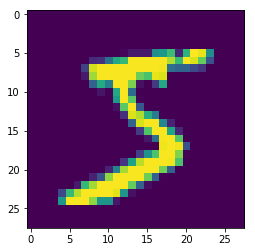

In [0]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0],  28, 28,1)
X_test = X_test.reshape(X_test.shape[0],  28, 28,1)

In [0]:
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)
input_img = Input(shape=(28, 28, 1))
print(input_img)



Tensor("input_1:0", shape=(?, 28, 28, 1), dtype=float32)


In [0]:
l1 = Conv2D(64, (3,3), activation='relu', padding = 'valid')(input_img)
l2 = Conv2D(32, (1,1), padding='valid', activation='relu')(l1)
l3 = MaxPooling2D((2,2),strides=(2,2))(l2)
mid = Conv2D(8, (3,3), padding='valid', activation='relu')(l3)
l4 = Conv2D(8, (1,1), padding='valid', activation='relu')(mid)
l5 = MaxPooling2D((2,2),strides=(1,1))(l4)
#l5 = AveragePooling2D((2,2),strides=(2,2))(l4)
l6 = Conv2D(8, (3,3), padding='valid', activation='relu')(l5)
l7 = Conv2D(6, (1,1), padding='valid', activation='relu')(l6)
#l8 = MaxPooling2D((2,2),strides=(2,2))(l7)
output = Flatten()(l7)
out    = Dense(10, activation='softmax')(output)

In [0]:
model = Model(inputs = input_img, outputs = out)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 8)         2312      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 8)         72        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 8)         0   

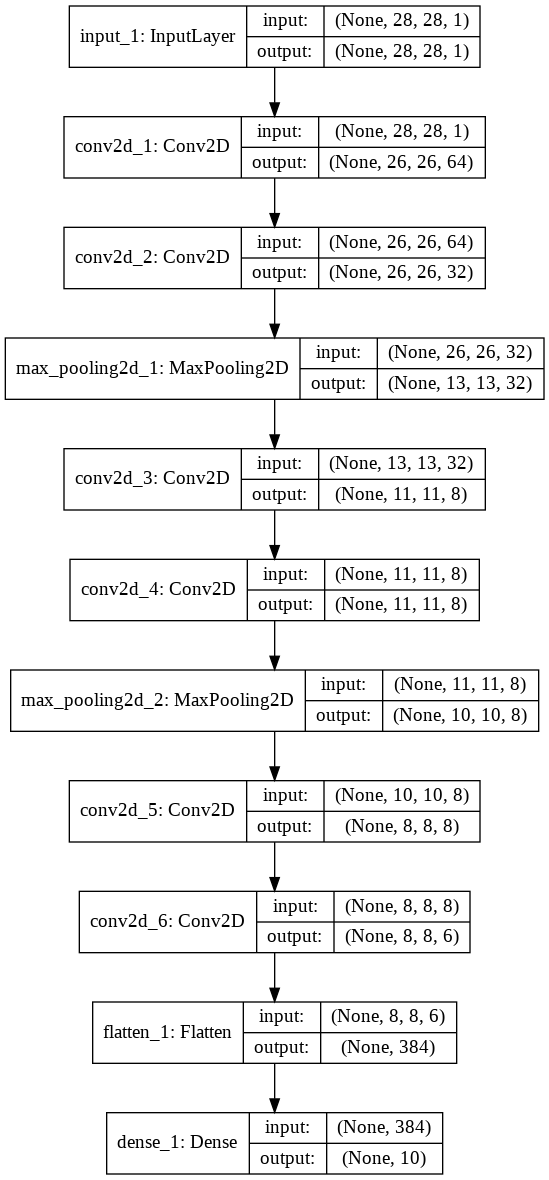

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_MNIST_9.5K.png', show_shapes=True, show_layer_names=True)

In [0]:
epochs = 10
#lrate = 0.001
#decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.2360 - acc: 0.9239 - val_loss: 0.0871 - val_acc: 0.9740
Epoch 2/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0936 - acc: 0.9714 - val_loss: 0.0984 - val_acc: 0.9690
Epoch 3/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0712 - acc: 0.9780 - val_loss: 0.0558 - val_acc: 0.9833
Epoch 4/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0609 - acc: 0.9814 - val_loss: 0.0581 - val_acc: 0.9813
Epoch 5/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0521 - acc: 0.9838 - val_loss: 0.0439 - val_acc: 0.9865
Epoch 6/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0459 - acc: 0.9860 - val_loss: 0.0448 - val_acc: 0.9860
Epoch 7/10
60000/6000

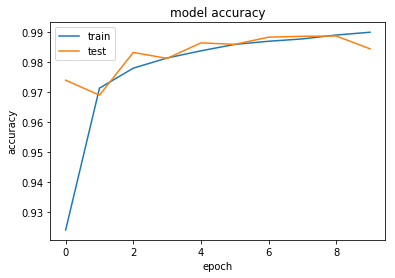

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

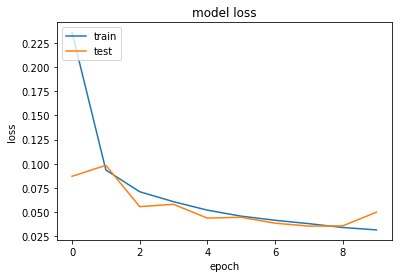

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()